# EDA ON STACK OVERFLOW 2018 DATA

**DATA LOADING**

*Importing modules*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Loading 2018 stackoverflow data*

In [3]:
df=pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv")

<ipython-input-3-802ceec4e508>:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv")


*Initial exploration*

In [4]:
#First few rows of the data
df.head(10)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
9,16,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Designer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#dimensions of the data
df.shape

(98855, 129)

In [6]:
#datatypes of the data
df.dtypes

Respondent        int64
Hobby            object
OpenSource       object
Country          object
Student          object
                  ...  
Age              object
Dependents       object
MilitaryUS       object
SurveyTooLong    object
SurveyEasy       object
Length: 129, dtype: object

In [7]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

**DATA** **CLEANING**

In [8]:
#checking for the missing or null values
missing_values=df.isnull().sum()
missing_values

Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64

By this we can get to the conclusion that there exist missing values

In [9]:
#calculating percentage of missing values
total_cells=np.product(df.shape)
total_missing=missing_values.sum()
percent=(total_missing/total_cells)*100

In [10]:
print('Total number of cells: ', total_cells)
print('Total number of missing values: ', total_missing)
print('Missing Percentage: ', percent, '%')

Total number of cells:  12752295
Total number of missing values:  4349316
Missing Percentage:  34.10614324715669 %


approximately 35% of data is missing we need to handle the missing values

**cleaning the gender column**

In [11]:
# Calculate the missing percentage of the 'Gender' column
df['Gender'].isnull().sum()
missing_percentage_gender = (df['Gender'].isnull().sum() / len(df['Gender'])) * 100

print("Missing percentage of the 'Gender' column:", missing_percentage_gender, "%")


Missing percentage of the 'Gender' column: 34.784280006069494 %


32% of the gender data is missing lets categorize them

In [12]:
df['Gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [13]:
#counting the number of each gender
df.groupby('Gender')['Gender'].count()

Gender
Female                                                                        4025
Female;Male                                                                     98
Female;Male;Non-binary, genderqueer, or gender non-conforming                    3
Female;Male;Transgender                                                         14
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Female;Non-binary, genderqueer, or gender non-conforming                        50
Female;Transgender                                                             145
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            24
Male                                                                         59458
Male;Non-binary, genderqueer, or gender non-conforming                         128
Male;Transgender                                                                29
Male;Transgender;Non-binary, genderqueer, or gender non-conforming              

Filling the missing values and reducing the number of divisions to male,female and non confirmed only to get easy analysis

In [14]:
df['Gender'] = df['Gender'].fillna('Non-binary, genderqueer, or gender non-conforming')
df['Gender'].replace('Female;Male;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Male;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Transgender;Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) ##not sure
df['Gender'].replace('Female;Male', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender', 'Female', inplace =True)
df['Gender'].replace('Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) #
df['Gender'].replace('Transgender', 'Male', inplace =True)

In [15]:
df.groupby('Gender')['Gender'].count()

Gender
Female             4438
Male              59696
Non-conforming    34721
Name: Gender, dtype: int64

In [16]:
df.shape

(98855, 129)

In [17]:
df.isnull().sum()['Gender']

0

Hence, there are no existing null values in gender column






**cleaning the country column**

In [18]:
df.groupby('Country')['Country'].count()

Country
Afghanistan                              64
Albania                                 109
Algeria                                 130
Andorra                                  15
Angola                                   11
                                       ... 
Venezuela, Bolivarian Republic of...    123
Viet Nam                                331
Yemen                                    13
Zambia                                    9
Zimbabwe                                 39
Name: Country, Length: 183, dtype: int64

In [19]:
df['Country'].isnull().sum()

412

In [20]:
#filling null values
df['Country'].fillna(method='ffill', inplace=True)

In [21]:
df['Country'].isnull().sum()

0

Hence, there are no existing null values in country column

**cleaning the hobbies column**

In [22]:
df['Hobby'].isnull().sum()

0

In [23]:
df.groupby('Hobby')['Hobby'].count()

Hobby
No     18958
Yes    79897
Name: Hobby, dtype: int64

As the hobbies are categorized only to yes or not further we dont need to categorize them.

In [24]:
df['Hobby'].isnull().sum()

0

Hence, there are no existing null values in hobbies column

**cleaning the undergradmajor column**

In [25]:
df['UndergradMajor'].isnull().sum()

19819

In [26]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering          50336
Another engineering discipline (ex. civil, electrical, mechanical)        6945
Information systems, information technology, or system administration     6507
A natural science (ex. biology, chemistry, physics)                       3050
Mathematics or statistics                                                 2818
Web development or web design                                             2418
A business discipline (ex. accounting, finance, marketing)                1921
A humanities discipline (ex. literature, history, philosophy)             1590
A social science (ex. anthropology, psychology, political science)        1377
Fine arts or performing arts (ex. graphic design, music, studio art)      1135
I never declared a major                                                   693
A health science (ex. nursing, pharmacy, radiology)                        246
Name: count, dtype: int64

In [27]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]

    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

the values in the "UndergradMajor" column are classified based on certain conditions.

In [28]:
df = refactor_major(df)

In [29]:
df['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [30]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer Science    50336
No major            20512
Engineering          6945
Info Systems         6507
Arts and Science     4102
Other Science        3296
Math/Stat            2818
Web Design/Dev       2418
Business             1921
Name: count, dtype: int64

In [31]:
df['UndergradMajor'].isnull().sum()

0

In [32]:
df.dropna(subset=['UndergradMajor'], inplace=True)

In [33]:
df['UndergradMajor'].isnull().sum()

0

As we assigned the remaining null values to the category of no major
Hence, there are no existing null values in the undergradmajor column

**cleaning the jobsearchstatus column**

In [34]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
I’m not actively looking, but I am open to new opportunities    47556
I am not interested in new job opportunities                    19296
I am actively looking for a job                                 12636
Name: count, dtype: int64

In [35]:
#dropping null values
df.dropna(subset=['JobSearchStatus'], inplace=True)

Categorizing those into groups: the ones who are seeking for job and the ones who are not seeking for job and others

In [36]:
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''

    conditions_job = [(df['JobSearchStatus'] == 'I am actively looking for a job'),
                    (df['JobSearchStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobSearchStatus'] == 'I’m not actively looking, but I am open to new opportunities')]

    choices_job = ['Seeking', 'Not seeking']

    df['JobSearchStatus'] = np.select(conditions_job, choices_job, default=np.nan)

    return df


In [37]:
df = refactor_job(df)

In [38]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
Not seeking    66852
Seeking        12636
Name: count, dtype: int64

In [39]:
df['JobSearchStatus'].isnull().sum()

0

Hence, there are no existing null values in the jobsearchstatus column

**cleaning the Employement column**

In [40]:
df['Employment'].value_counts()

Employment
Employed full-time                                      58551
Independent contractor, freelancer, or self-employed     7797
Not employed, but looking for work                       4604
Employed part-time                                       4170
Not employed, and not looking for work                   3210
Retired                                                   138
Name: count, dtype: int64

In [41]:
df['Employment'].isnull().sum()

1018

In [42]:
df['Employment'].fillna(method='ffill', inplace=True)

In [43]:
df['Employment']

0                            Employed part-time
1                            Employed full-time
2                            Employed full-time
3                            Employed full-time
4                            Employed full-time
                          ...                  
89967    Not employed, and not looking for work
89968        Not employed, but looking for work
89969    Not employed, and not looking for work
89970    Not employed, and not looking for work
89971    Not employed, and not looking for work
Name: Employment, Length: 79488, dtype: object

In [44]:
df['Employment'].isnull().sum()

0

Hence, there are no existing null values in the employment column

**Job** **Satisfaction**

In [45]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
Moderately satisfied                  25908
Extremely satisfied                   12395
Slightly satisfied                     9973
Slightly dissatisfied                  7037
Moderately dissatisfied                6286
Neither satisfied nor dissatisfied     4935
Extremely dissatisfied                 2472
Name: count, dtype: int64

In [46]:
df['JobSatisfaction'].isnull().sum()

10482

In [47]:
#filling the null values
df['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [48]:
df['JobSatisfaction'].isnull().sum()

0

Hence, there are no existing null values in the job satisfaction column

**Race Ethnicity**

In [49]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or of African descent                                                                                                                                 1204
Black or of African descent;East Asian                                                                                                                         7
Black or of African descent;East Asian;Hispanic or Latino/Latina                                                                                               2
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian                    1
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian        1
                                                                                                                                                           ...  
Native American, Pac

combining the given Ethnicity by str.match which means if each string starts with a match of a regular expression pattern then they will be categorized.


In [50]:
df.loc[df['RaceEthnicity'].str.match('Biracial') == True, 'RaceEthnicity'] = 'Biracial'
df.loc[df['RaceEthnicity'].str.match('Black or of African descent') == True, 'RaceEthnicity'] = 'Black or African descent'
df.loc[df['RaceEthnicity'].str.match('East Asian') == True, 'RaceEthnicity'] = 'East Asian'
df.loc[df['RaceEthnicity'].str.match('Hispanic or Latino') == True, 'RaceEthnicity'] = 'Hispanic or Latino'
df.loc[df['RaceEthnicity'].str.match('Indigenous') == True, 'RaceEthnicity'] = 'Indigenous'
df.loc[df['RaceEthnicity'].str.match('Middle Eastern') == True, 'RaceEthnicity'] = 'Middle Eastern'
df.loc[df['RaceEthnicity'].str.match('South') == True, 'RaceEthnicity'] = 'South Asian'
df.loc[df['RaceEthnicity'].str.match('White or of European descent') == True, 'RaceEthnicity'] = 'White or European descent'
df.loc[df['RaceEthnicity'].str.match('Multiracial') == True, 'RaceEthnicity'] = 'Multiracial'
df.loc[df['RaceEthnicity'].str.match('Native American') == True, 'RaceEthnicity'] = 'Native American'

In [51]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or African descent      1549
East Asian                    2787
Hispanic or Latino            3592
Middle Eastern                2176
Native American                286
South Asian                   6200
White or European descent    39320
Name: RaceEthnicity, dtype: int64

In [52]:
df['RaceEthnicity'].isnull().sum()

23578

In [53]:
#This code performs forward and backward filling of missing values in the RaceEthnicity column based on the values in the Country column.
df['RaceEthnicity']=df.groupby(['Country'])['RaceEthnicity'].bfill().ffill()

In [54]:
df['RaceEthnicity'].isnull().sum()

0

Hence, there are no existing null values in the race ethnicity column

**DevType**

In [55]:
df['DevType'].isnull().sum()

728

In [56]:
df['DevType'].fillna(method='ffill', inplace=True)

In [57]:
df.groupby('DevType')['DevType'].count()

DevType
Back-end developer                                                                                                                                                                                           5372
Back-end developer;C-suite executive (CEO, CTO, etc.)                                                                                                                                                          59
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst                                                                                                                                  5
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Data scientist or machine learning specialist                                                                                    1
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Data scientist or machine learning specialist;Database administrator;Desi

combining the given DevType by str.match which means if each string starts with a match of a regular expression pattern then they will be categorized.

In [58]:
#categorizing the given fields into developer,manager,student,non developer roles
df.loc[df['DevType'].str.match('Back-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Student') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('QA or test developer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Product manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Mobile developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Marketing or sales professional') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('System administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Game or graphics developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Full-stack developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Front-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Engineering manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Embedded applications or devices developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Educator or academic researcher') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('DevOps specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Desktop or enterprise applications developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Designer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Database administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data scientist or machine learning specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data or business analyst') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('C-suite executive') == True, 'DevType'] = 'Developer'


In [59]:
df.groupby('DevType')['DevType'].count()

DevType
Developer        73032
Manager            665
Non developer     2791
Student           3000
Name: DevType, dtype: int64

**Language worked with**

In [60]:
#this return tha 3 most frequent entries or the 3 most used languages
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
C#;JavaScript;SQL;HTML;CSS     1235
JavaScript;PHP;SQL;HTML;CSS    1095
Java                            855
Name: count, dtype: int64

In [61]:
df['LanguageWorkedWith'].isnull().sum()

9985

In [62]:
#filling missing values
df['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [63]:
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
C#;JavaScript;SQL;HTML;CSS     1383
JavaScript;PHP;SQL;HTML;CSS    1226
Java                            989
Name: count, dtype: int64

In [64]:
df['LanguageWorkedWith'].isnull().sum()

0

Hence, there are no existing null values in the language work with column

**Language desirednext year**

In [65]:
#this return tha 3 most frequent entries that may appear the next year.
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
Python                                   718
C#;JavaScript;SQL;TypeScript;HTML;CSS    557
C#                                       522
Name: count, dtype: int64

In [66]:
df['LanguageDesireNextYear'].isnull().sum()

14147

In [67]:
#filling missing values
df['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [68]:
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
Python                                   878
C#;JavaScript;SQL;TypeScript;HTML;CSS    690
C#                                       629
Name: count, dtype: int64

In [69]:
df['LanguageDesireNextYear'].isnull().sum()

0

Hence, there are no existing null values in the language Desire next year column

**Yearscodingprof**

In [70]:
#this returns the the top 10 most coding proficient ones
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
0-2 years           22612
3-5 years           20883
6-8 years           11177
9-11 years           7456
12-14 years          4220
15-17 years          2987
18-20 years          2810
21-23 years          1352
30 or more years     1289
24-26 years           853
Name: count, dtype: int64

In [71]:
df['YearsCodingProf'].isnull().sum()

3349

In [72]:
df['YearsCodingProf'].fillna(method='ffill', inplace=True)

In [73]:
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years           23773
0-2 years           22781
6-8 years           11274
9-11 years           7527
12-14 years          4267
15-17 years          3007
18-20 years          2841
21-23 years          1365
30 or more years     1294
24-26 years           856
Name: count, dtype: int64

In [74]:
df['YearsCodingProf'].isnull().sum()

0

Hence, there are no existing null values in the yearscodingprof column

In [75]:
#the top 10 years coding ones
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
3-5 years           19100
6-8 years           16537
9-11 years          10578
0-2 years            8022
12-14 years          7069
15-17 years          5459
18-20 years          4472
30 or more years     3136
21-23 years          2377
24-26 years          1671
Name: count, dtype: int64

In [76]:
df['YearsCoding'].isnull().sum()

105

In [77]:
#filling missing values
df['YearsCoding'].fillna(method='ffill', inplace=True)

In [78]:
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
3-5 years           19135
6-8 years           16554
9-11 years          10585
0-2 years            8043
12-14 years          7077
15-17 years          5462
18-20 years          4476
30 or more years     3144
21-23 years          2378
24-26 years          1671
Name: count, dtype: int64

In [79]:
df['YearsCoding'].isnull().sum()

0

Hence, there are no existing null values in the yearscoding column

**Operating System**

In [80]:
#top 10 most used operating systems
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        34268
MacOS          18638
Linux-based    16069
BSD/Unix         139
Name: count, dtype: int64

In [81]:
df['OperatingSystem'].isnull().sum()

10374

In [82]:
#filling values
df['OperatingSystem'].fillna(method='ffill', inplace=True)

In [83]:
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        39475
MacOS          21433
Linux-based    18406
BSD/Unix         174
Name: count, dtype: int64

In [84]:
df['OperatingSystem'].isnull().sum()

0

Hence, there are no existing null values in the operating system column

**Salary Type**

In [85]:
#top 10 frequently used salary types
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    26201
Yearly     22541
Weekly      2248
Name: count, dtype: int64

In [86]:
df['SalaryType'].isnull().sum()

28498

In [87]:
df['SalaryType'].fillna(method='ffill', inplace=True)

In [88]:
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    40953
Yearly     34333
Weekly      4202
Name: count, dtype: int64

In [89]:
df['SalaryType'].isnull().sum()

0

Hence, there are no existing null values in the salary type column

**Currency**

In [90]:
#top 10 used currency
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)               20599
Euros (€)                      15201
Indian rupees (₹)               7908
British pounds sterling (£)     4856
Canadian dollars (C$)           2535
Russian rubles (₽)              1768
Brazilian reais (R$)            1663
Australian dollars (A$)         1571
Polish złoty (zł)               1434
Swedish kroner (SEK)             864
Name: count, dtype: int64

In [91]:
df['Currency'].isnull().sum()

17483

In [92]:
df['Currency'].fillna(method='ffill', inplace=True)

In [93]:
df.dropna(subset=['Currency'], inplace = True)

In [94]:
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)               26356
Euros (€)                      19465
Indian rupees (₹)              10152
British pounds sterling (£)     6194
Canadian dollars (C$)           3289
Russian rubles (₽)              2340
Brazilian reais (R$)            2122
Australian dollars (A$)         1970
Polish złoty (zł)               1856
Swedish kroner (SEK)            1101
Name: count, dtype: int64

In [95]:
df['Currency'].isnull().sum()

0

Hence, there are no existing null values in the currency column

renaming the column for our convinience

In [96]:
col=['Age','ConvertedSalary','Country','Currency','DevType','Employment','RaceEthnicity','Gender','SalaryType','Hobby','JobSatisfaction','JobSearchStatus','OperatingSystem','UndergradMajor','YearsCoding','YearsCodingProf','LanguageDesireNextYear','LanguageWorkedWith','FormalEducation']
df1=df[col]
#renaming the coloumn
# 'ConvertedSalary': 'SalaryUSD'
df.rename(columns={'ConvertedSalary': 'SalaryUSD' }, inplace =True)
df.sort_index(axis=1).head(2)

,AIDangerous,AIFuture,AIInteresting,AIResponsible,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsActions,AdsAgreeDisagree1,AdsAgreeDisagree2,...,SurveyEasy,SurveyTooLong,TimeAfterBootcamp,TimeFullyProductive,UndergradMajor,UpdateCV,VersionControl,WakeTime,YearsCoding,YearsCodingProf
1,Increasing automation of jobs,I'm excited about the possibilities more than ...,Increasing automation of jobs,The developers or the people creating the AI,Yes,Yes,The website I was visiting asked me to disable it,NaN,Somewhat agree,Neither agree nor disagree,...,Somewhat easy,The survey was an appropriate length,NaN,One to three months,Other Science,I saw an employer’s advertisement,Git;Subversion,Between 6:01 - 7:00 AM,30 or more years,18-20 years
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Computer Science,NaN,NaN,NaN,24-26 years,6-8 years


In [97]:
#top 10 salaries
df['SalaryUSD'].value_counts().nlargest(10)

SalaryUSD
0.0          842
120000.0     524
100000.0     497
80000.0      396
1000000.0    382
110000.0     371
90000.0      364
150000.0     357
60000.0      351
75000.0      337
Name: count, dtype: int64

In [98]:
df['SalaryUSD'].isnull().sum()

31786

In [99]:
#grouping the salary based on the devtype and their country
mean_salary = df.groupby(['DevType','Country'])['SalaryUSD'].mean()

In [100]:
mean_salary.nlargest(10)

DevType        Country      
Student        Saudi Arabia     1500000.0
Developer      Andorra           525089.5
Manager        Hungary           516000.0
               Netherlands       507175.0
Non developer  Algeria           360000.0
               Cyprus            293736.0
Developer      Liechtenstein     284028.0
Student        Finland           272212.0
Manager        Denmark           262920.6
Student        Israel            256522.4
Name: SalaryUSD, dtype: float64

In [101]:
#grouping the salary based on the devtype and their country and results the mean for each
means = df.groupby(['YearsCodingProf','DevType', 'Country'])['SalaryUSD'].transform('mean')

In [102]:
#filling the null values with the mean values
df['SalaryUSD'] = df['SalaryUSD'].fillna(means)

In [103]:
#grouping the mean salry based on the yearscodingprof,devtype and country columns
mean_salary = df.groupby(['YearsCodingProf','DevType','Country'])['SalaryUSD'].mean()

In [104]:
mean_salary.nlargest(10)

YearsCodingProf  DevType        Country                             
9-11 years       Student        Saudi Arabia                            1500000.0
12-14 years      Non developer  Norway                                  1000000.0
                 Student        Switzerland                             1000000.0
15-17 years      Non developer  Australia                               1000000.0
                                New Zealand                             1000000.0
21-23 years      Developer      Japan                                   1000000.0
                                Venezuela, Bolivarian Republic of...    1000000.0
                 Non developer  Sweden                                  1000000.0
                 Student        Finland                                 1000000.0
24-26 years      Manager        Canada                                  1000000.0
Name: SalaryUSD, dtype: float64

In [105]:
df.dropna(subset=['SalaryUSD'], inplace = True)

**AGE**

In [106]:
#frequently used top 10 ages
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old     30969
18 - 24 years old     14847
35 - 44 years old     10980
45 - 54 years old      3072
Under 18 years old     1549
55 - 64 years old       865
65 years or older       144
Name: count, dtype: int64

In [107]:
df['Age'].isnull().sum()

16374

In [108]:
df['Age'].fillna(method='ffill', inplace=True)

In [109]:
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old     38797
18 - 24 years old     19074
35 - 44 years old     13665
45 - 54 years old      3821
Under 18 years old     2165
55 - 64 years old      1093
65 years or older       185
Name: count, dtype: int64

In [110]:
df['Age'].isnull().sum()

0

Hence, there are no existing null values in age column

**Formal Education**


In [111]:
df['FormalEducation'].isnull().sum()

1549

In [112]:
df['FormalEducation'].value_counts()

FormalEducation
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              36010
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           17529
Some college/university study without earning a degree                                 9737
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7088
Associate degree                                                                       2407
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1754
Primary/elementary school                                                              1217
Professional degree (JD, MD, etc.)                                                     1073
I never completed any formal education                                                  436
Name: count, dtype: int64

In [113]:
#Changing column's name for our convinienccce
df.rename(columns={'FormalEducation':'EdLevel'}, inplace =True)

Categorizing the given fields into few optimized fields

In [114]:
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree'),
                    (df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree')
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)')
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

In [115]:
df = refactor_ed(df)

In [116]:
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [117]:
df['EdLevel'].value_counts()

EdLevel
Bachelors       37559
No Degree       18478
Masters         17529
Associate        2407
Doctorate        1754
Professional     1073
Name: count, dtype: int64

In [118]:
df['EdLevel'].isnull().sum()

0

Hence, there are no existing null values in the edlevel column

*So far We cleaned a lot of data. Therefore we can check the percent again*

In [119]:
cleaned_2018 = df[df.notnull()]

In [120]:
cleaned_2018.head(10)

,Respondent,Hobby,OpenSource,Country,Student,Employment,EdLevel,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,Bachelors,Other Science,"10,000 or more employees",Developer,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate,Computer Science,20 to 99 employees,Manager,...,NaN,Non-conforming,NaN,NaN,White or European descent,35 - 44 years old,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,Bachelors,Computer Science,100 to 499 employees,Developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,No Degree,Computer Science,"10,000 or more employees",Developer,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,Bachelors,Computer Science,10 to 19 employees,Developer,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,9,Yes,Yes,United States,No,Employed full-time,No Degree,Computer Science,"10,000 or more employees",Developer,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,Bachelors,Computer Science,10 to 19 employees,Non developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,11,Yes,Yes,United States,No,Employed full-time,No Degree,Arts and Science,100 to 499 employees,Developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
13,20,No,No,India,No,Employed full-time,Bachelors,Engineering,20 to 99 employees,Developer,...,I don't typically exercise,Non-conforming,NaN,NaN,South Asian,35 - 44 years old,NaN,NaN,NaN,NaN
14,21,No,No,Netherlands,"Yes, full-time",Employed full-time,No Degree,No major,20 to 99 employees,Developer,...,Daily or almost every day,Male,NaN,Associate degree,White or European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Neither easy nor difficult


In [121]:
#calculating percentage of missing values
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

In [122]:
print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  10165200
Total missing :  2079651
Missing Percentage:  20.45853500177075 %


Hence, we reduced the missing data from 35% to 19% which is far way better. And the remaining null values could be present in the columns thatwe are not going to use in our analysis

**Outlier detection**

In [123]:
#detecting outliers using the interquartile range (IQR) method
def detect_outliers_iqr(dataframe, fields):
    outliers_indices = []
    for feature in fields:
        # Calculate the first and third quartiles
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        # Calculating the interquartile range (IQR)(diff of remaining)
        IQR = Q3 - Q1
        # Defining the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Finding outliers based on the lower and upper bounds
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)].index
        # Adding the indices of outliers to the list to know whether they exist or not
        outliers_indices.extend(outliers)
    # Return indices of outliers
    return list(set(outliers_indices))

Calculating the outliers for different columns

In [124]:
#outliers for Salaryusd
cols = [ 'SalaryUSD']


In [125]:
outliers_indices_iqr = detect_outliers_iqr(df,cols )

In [126]:
#Printig the indices of outliers detected using the IQR method
print("Indices of outliers detected using IQR method:", outliers_indices_iqr)

Indices of outliers detected using IQR method: [8193, 8195, 24580, 8, 49160, 8203, 32784, 73747, 73748, 32789, 40981, 27, 73758, 32799, 24608, 8232, 65577, 32812, 65580, 16430, 65585, 16434, 65587, 41015, 49207, 32827, 16446, 16449, 41030, 81992, 32846, 8271, 32848, 8274, 16466, 8276, 24659, 65620, 41047, 49248, 82017, 16489, 49258, 24683, 8302, 41070, 73842, 41080, 65658, 125, 73855, 128, 16513, 73889, 32930, 41130, 24760, 32952, 57539, 49348, 197, 57553, 65752, 32987, 225, 24802, 8421, 73957, 236, 8436, 41205, 8440, 82172, 16637, 73988, 73990, 57608, 41225, 269, 41229, 49423, 57619, 8468, 65811, 74010, 57629, 74014, 49441, 57637, 41258, 57642, 24877, 74032, 49457, 57649, 57653, 57656, 74045, 8511, 24903, 328, 24907, 82251, 16722, 74072, 49499, 24926, 41317, 24934, 74088, 74096, 65907, 41332, 74103, 65915, 74107, 8575, 385, 41349, 82310, 74121, 396, 24973, 57747, 406, 16790, 24983, 65942, 8604, 416, 49568, 49569, 65954, 41380, 65957, 65958, 41384, 49578, 33203, 8628, 441, 41401, 74174

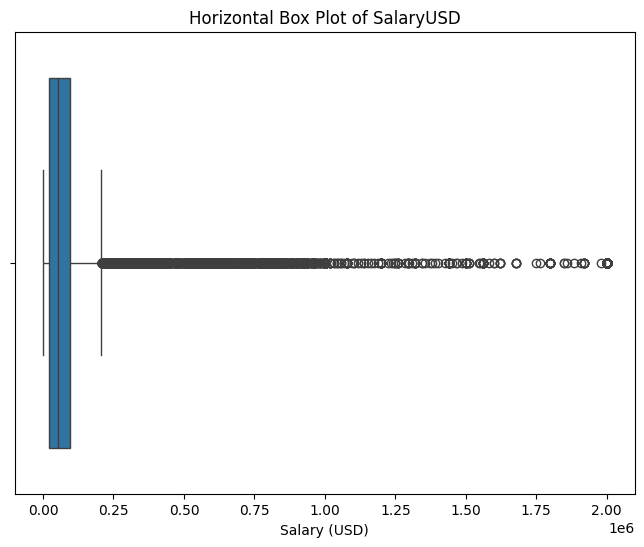

In [127]:
# Visualizing the outliers detected for 'Salaryusd' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SalaryUSD', orient='h')
plt.title('Horizontal Box Plot of SalaryUSD')
plt.xlabel('Salary (USD)')
plt.show()


From the Box plot, we get to know that the distribution is a bit right skewed. There are potential outliers present here.

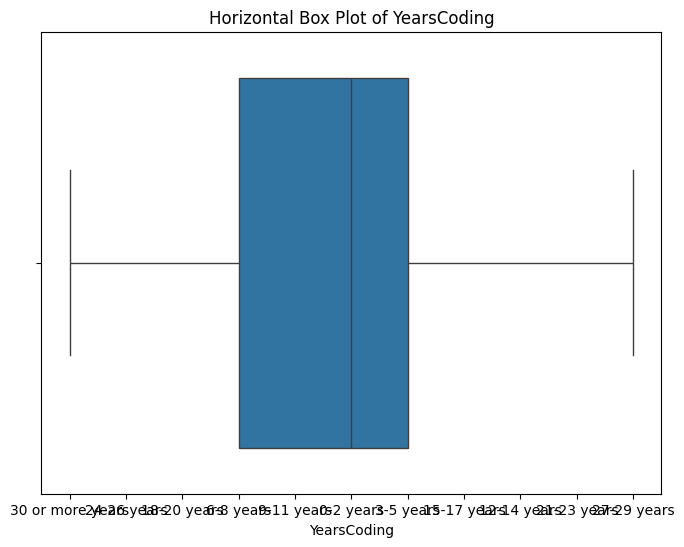

In [128]:
# Visualizing the outliers detected for 'YearsCoding' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='YearsCoding', orient='h')
plt.title('Horizontal Box Plot of YearsCoding')
plt.xlabel('YearsCoding')
plt.show()


From the Box plot, we get to know that the distribution is symmetric and positively skewed. There are no potential outliers present here.

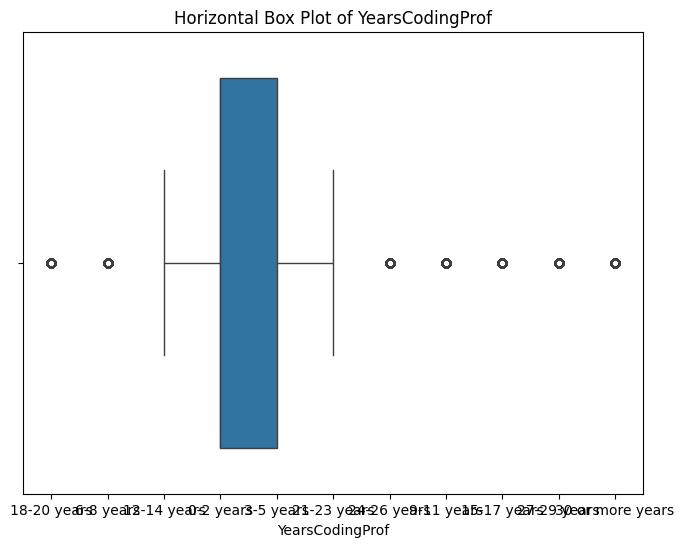

In [129]:
# Visualizing the outliers detected for 'YearsCodingProf' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='YearsCodingProf', orient='h')
plt.title('Horizontal Box Plot of YearsCodingProf')
plt.xlabel('YearsCodingProf')
plt.show()

From the Box plot, we get to know that the distribution is not symmetric and right skewed. There are no potential outliers present here.

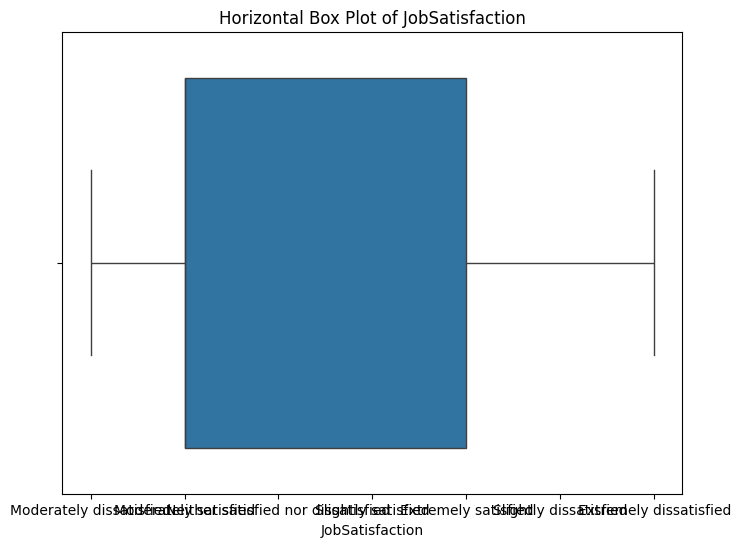

In [130]:
# Visualizing the outliers detected for 'JobSatisfaction' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='JobSatisfaction', orient='h')
plt.title('Horizontal Box Plot of JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.show()

From the Box plot, we get to know that the distribution is not symmetric and right skewed. There are no potential outliers present here.

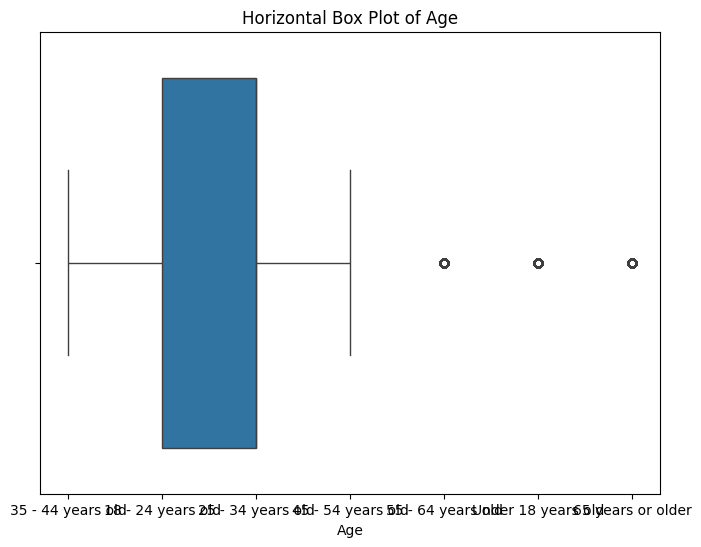

In [131]:
# Visualizing the outliers detected for 'age' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age', orient='h')
plt.title('Horizontal Box Plot of Age')
plt.xlabel('Age')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and positively skewed. There are no potential outliers present here.

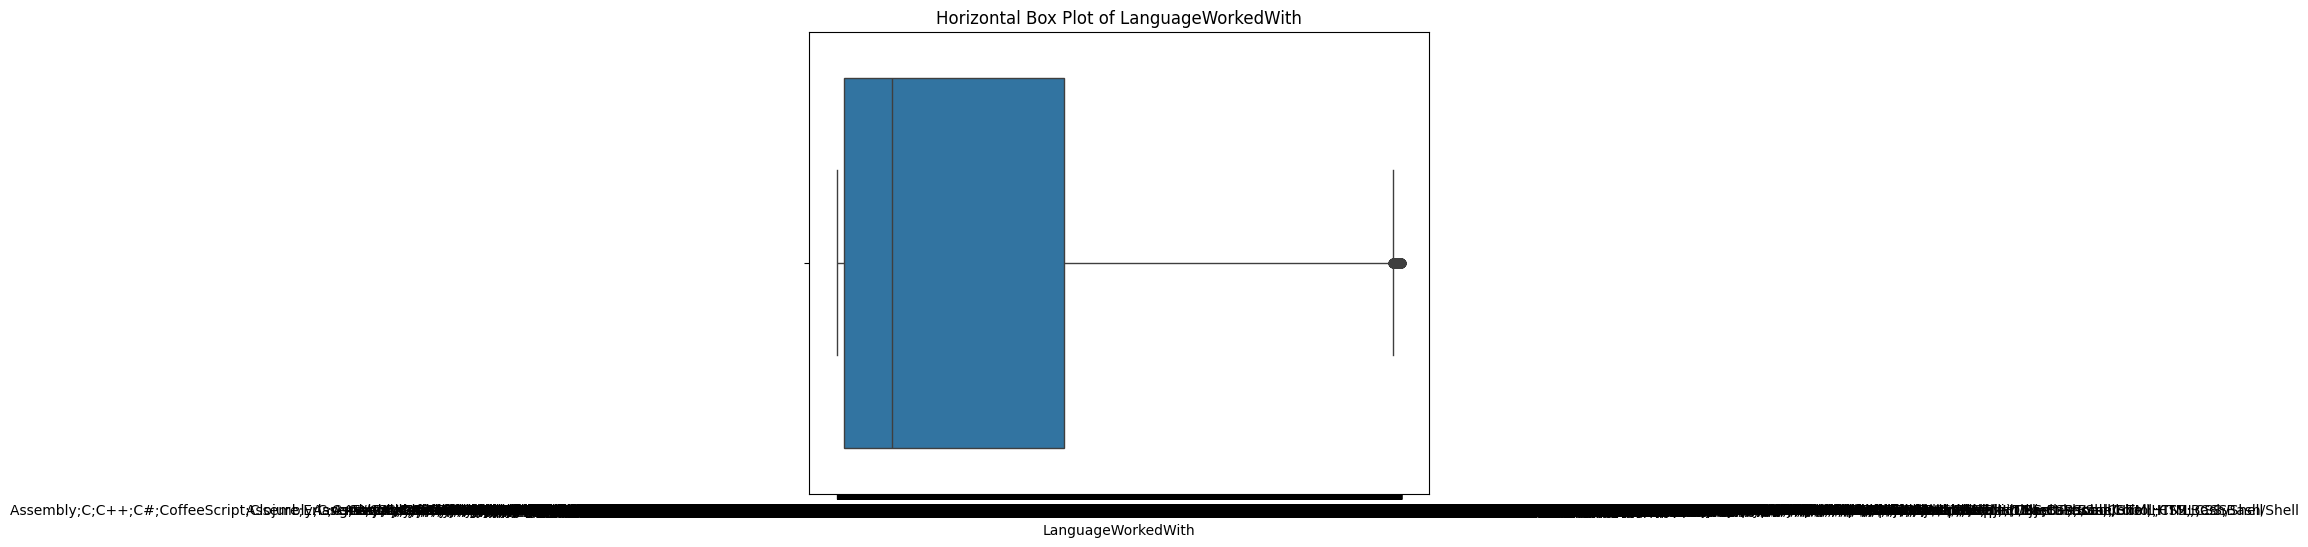

In [132]:
# Visualizing the outliers detected for 'LanguageWorkedWith' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='LanguageWorkedWith', orient='h')
plt.title('Horizontal Box Plot of LanguageWorkedWith')
plt.xlabel('LanguageWorkedWith')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and It is not skewed as well. There are no potential outliers present here.

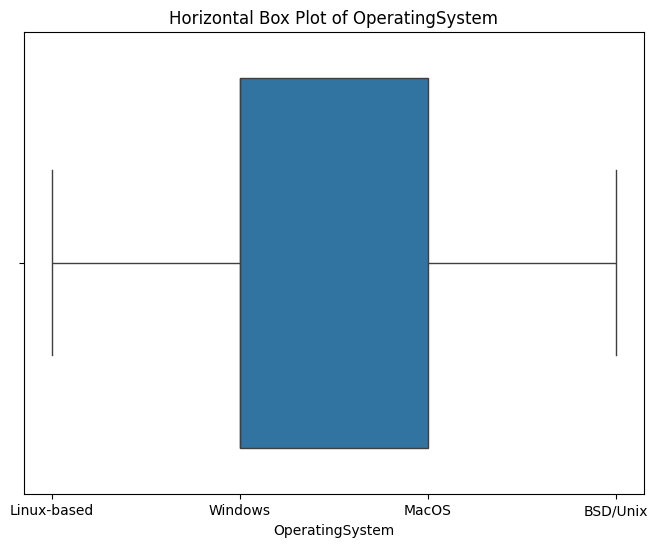

In [133]:
# Visualizing the outliers detected for 'OperatingSystem' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='OperatingSystem', orient='h')
plt.title('Horizontal Box Plot of OperatingSystem')
plt.xlabel('OperatingSystem')
plt.show()

From the Box plot, we get to know that the distribution is symmetric and It is not skewed as well. There are no potential outliers present here.

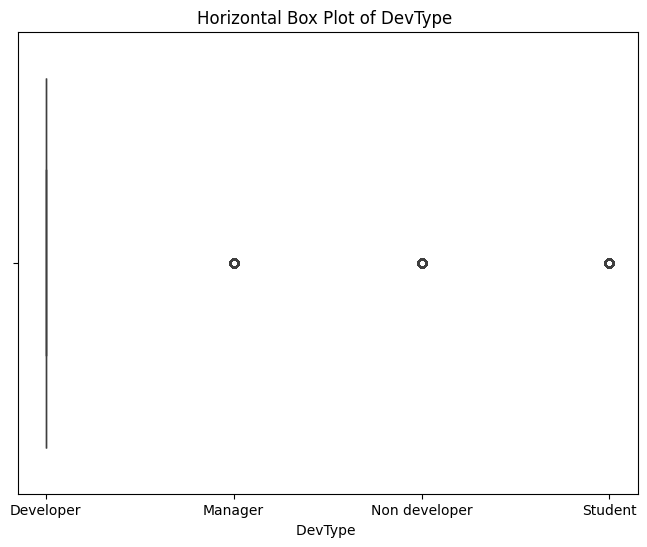

In [134]:
# Visualizing the outliers detected for 'DevType ' column with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DevType', orient='h')
plt.title('Horizontal Box Plot of DevType ')
plt.xlabel('DevType ')
plt.show()

From thi Box plot, We get to know that there are potential outliers.

*From all the Box plots we did, we can conclude that there are outlier in the DevType and SalaryUSD columns which are to be handled*

### **Demographic Analysis**

In [148]:
df=pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv")

<ipython-input-148-802ceec4e508>:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv")


In [150]:
# Select relevant columns for demographic analysis
demographic_columns = ['Country', 'Gender', 'Age', 'FormalEducation', 'RaceEthnicity']

In [151]:
# Filter the dataset with selected columns
demographic_df = df[demographic_columns]

In [152]:
# Function to plot demographic distributions
def plot_demographic_distribution(column, title):
    plt.figure(figsize=(12, 8))
    sns.countplot(y=demographic_df[column], order=demographic_df[column].value_counts().index)
    plt.title(f'{title} Distribution')
    plt.xlabel('Count')
    plt.ylabel(title)
    plt.show()

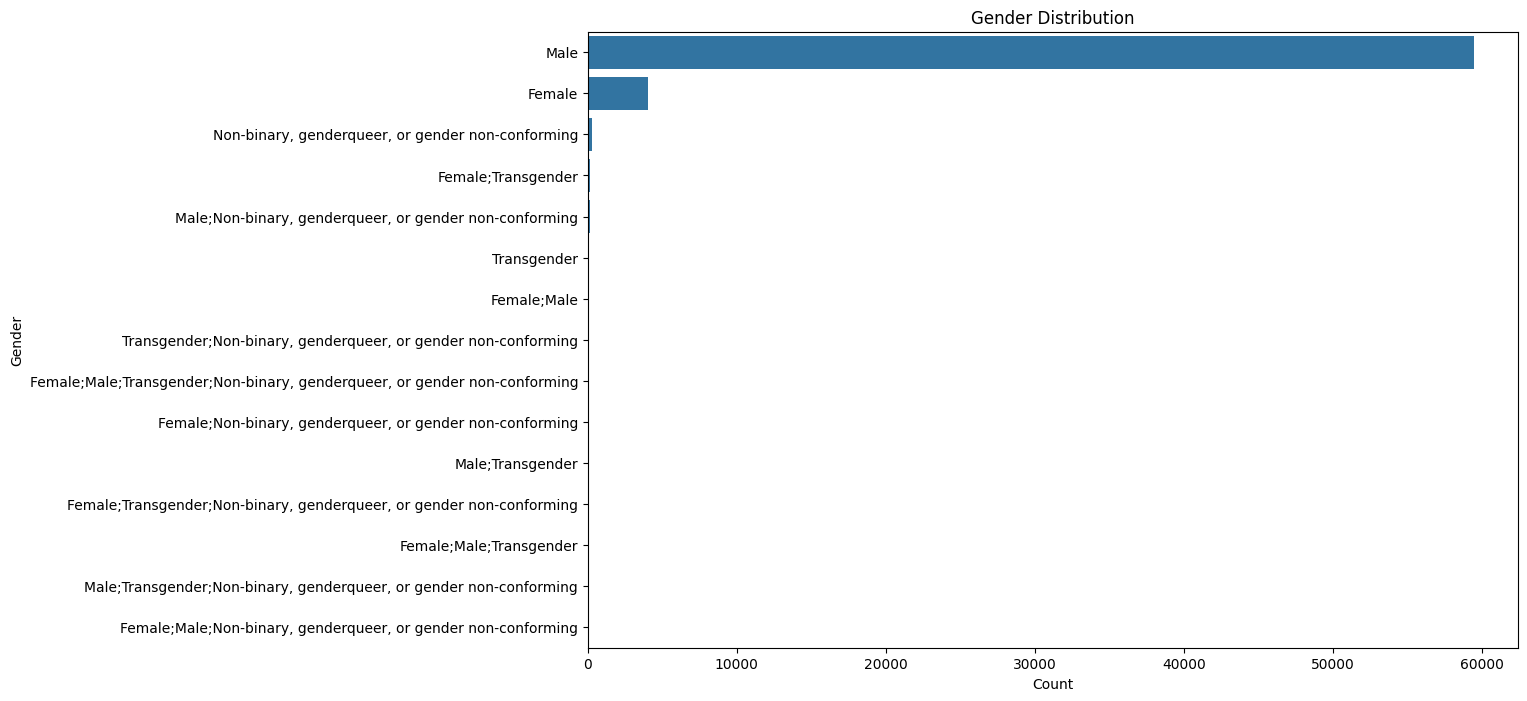

In [153]:
# Plot distribution of gender
plot_demographic_distribution('Gender', 'Gender')

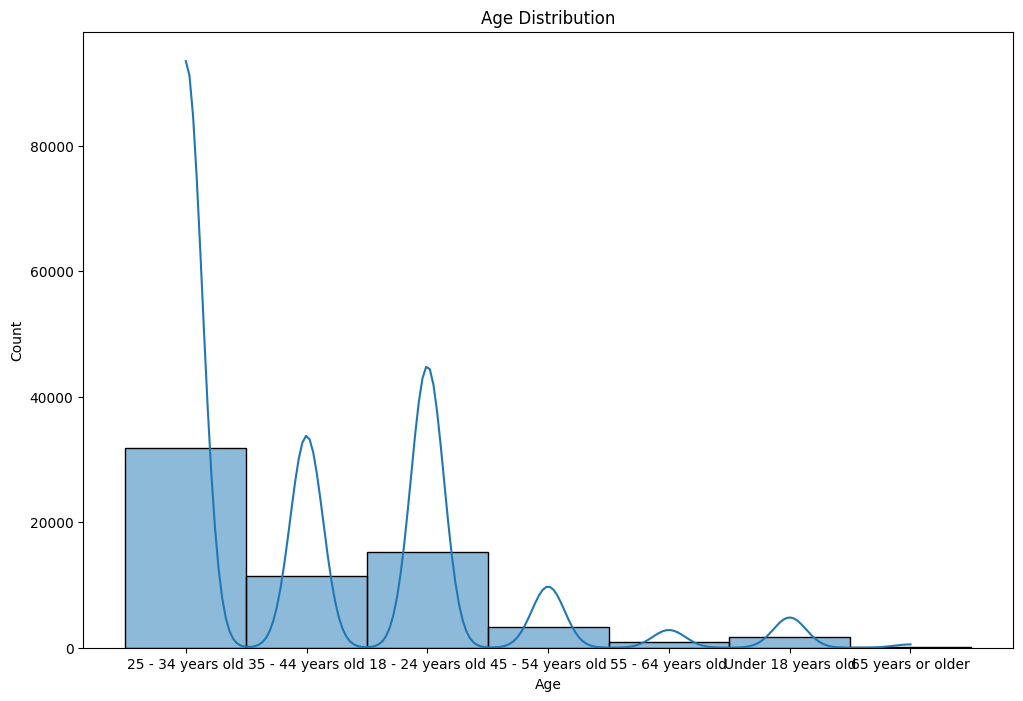

In [154]:
# Plot distribution of age
plt.figure(figsize=(12, 8))
sns.histplot(demographic_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

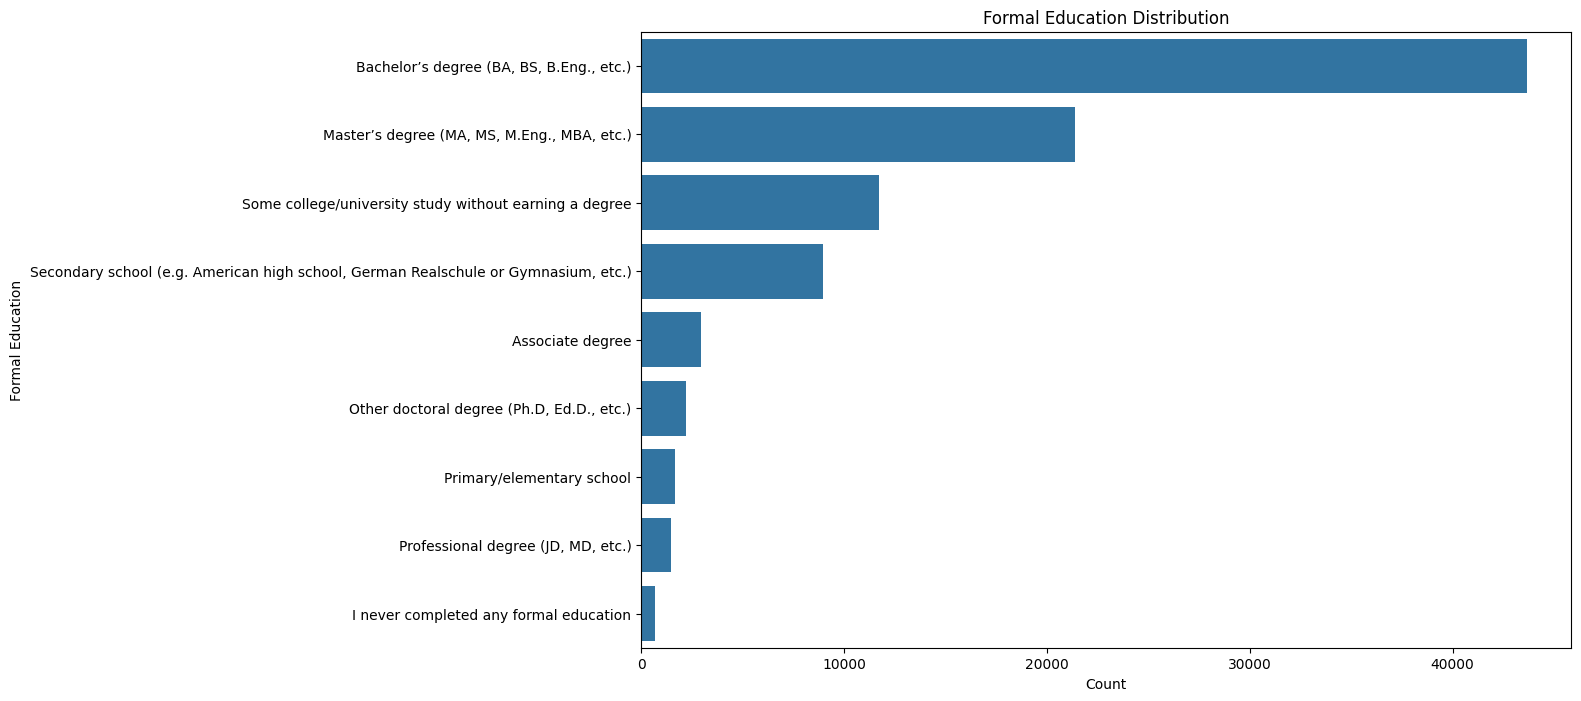

In [155]:
# Plot distribution of formal education
plot_demographic_distribution('FormalEducation', 'Formal Education')

**Insights and Conclusions of Demographic Analysis**

In [156]:
# Country insights
top_countries = demographic_df['Country'].value_counts().head(10)
print(f"Top 10 countries by number of respondents:\n{top_countries}\n")

Top 10 countries by number of respondents:
Country
United States         20309
India                 13721
Germany                6459
United Kingdom         6221
Canada                 3393
Russian Federation     2869
France                 2572
Brazil                 2505
Poland                 2122
Australia              2018
Name: count, dtype: int64



In [157]:
    # Gender insights
    gender_distribution = demographic_df['Gender'].value_counts()
    print(f"Gender distribution:\n{gender_distribution}\n")

Gender distribution:
Gender
Male                                                                         59458
Female                                                                        4025
Non-binary, genderqueer, or gender non-conforming                              284
Female;Transgender                                                             145
Male;Non-binary, genderqueer, or gender non-conforming                         128
Transgender                                                                    105
Female;Male                                                                     98
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Female;Non-binary, genderqueer, or gender non-conforming                        50
Male;Transgender                                                                29
Female;Transgender;Non-binary, genderqueer, or gender non-c

In [158]:
    # Formal education insights
    education_distribution = demographic_df['FormalEducation'].value_counts()
    print(f"Distribution of formal education:\n{education_distribution}\n")

Distribution of formal education:
FormalEducation
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              43659
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           21396
Some college/university study without earning a degree                                11710
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8951
Associate degree                                                                       2970
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2214
Primary/elementary school                                                              1656
Professional degree (JD, MD, etc.)                                                     1447
I never completed any formal education                                                  700
Name: count, dtype: int64



In [159]:
    # Race/Ethnicity insights
    race_ethnicity_distribution = demographic_df['RaceEthnicity'].value_counts()
    print(f"Race/Ethnicity distribution:\n{race_ethnicity_distribution}\n")

Race/Ethnicity distribution:
RaceEthnicity
White or of European descent                                                                                                                 40541
South Asian                                                                                                                                   6213
Hispanic or Latino/Latina                                                                                                                     2718
East Asian                                                                                                                                    2350
Middle Eastern                                                                                                                                1774
                                                                                                                                             ...  
Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander,